### Imports

In [25]:
# Pandas imports:
import pandas as pd

# NumPY imports:
import numpy as np

# Plotting imports:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# PyTorch imports:
import torch
import torch.nn as nn

import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

# Model and training imports:
from model import Model
from utils import train, evaluate

# Dataset imports:
from dataset import PassengerDataset

# Matplotlib imports:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Other imports:
import os
import math

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# 1) Loading the dataset:

In [28]:
# Getting the dataset path:
train_set_name, test_set_name = 'train.csv', 'test.csv'
train_set_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'data', train_set_name)
test_set_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'data', test_set_name)

# Loading the train and test sets:
train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

# 2) Data analysis:

### a) The train and test sizes:

In [29]:
train_size, test_size = len(train_set), len(test_set)
print(f'Train set size: {train_size}\nTest set size: {test_size}')

Train set size: 8693
Test set size: 4277


### b.1) Checking the first 5 entries of the train set:

In [30]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [31]:
test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### b.2) Checking the last 5 entries:

In [32]:
train_set.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


### c) Some useful statistics about the data:

In [33]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### d) Column data types and non-null values counts:

In [34]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### e) Class distribution:

In [35]:
# Getting the number of Transported and not Transported:
data = train_set.Transported

# Plotting the class distribution:
# sns.histplot(data=data)

### f) Plotting the attributes' distributions:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

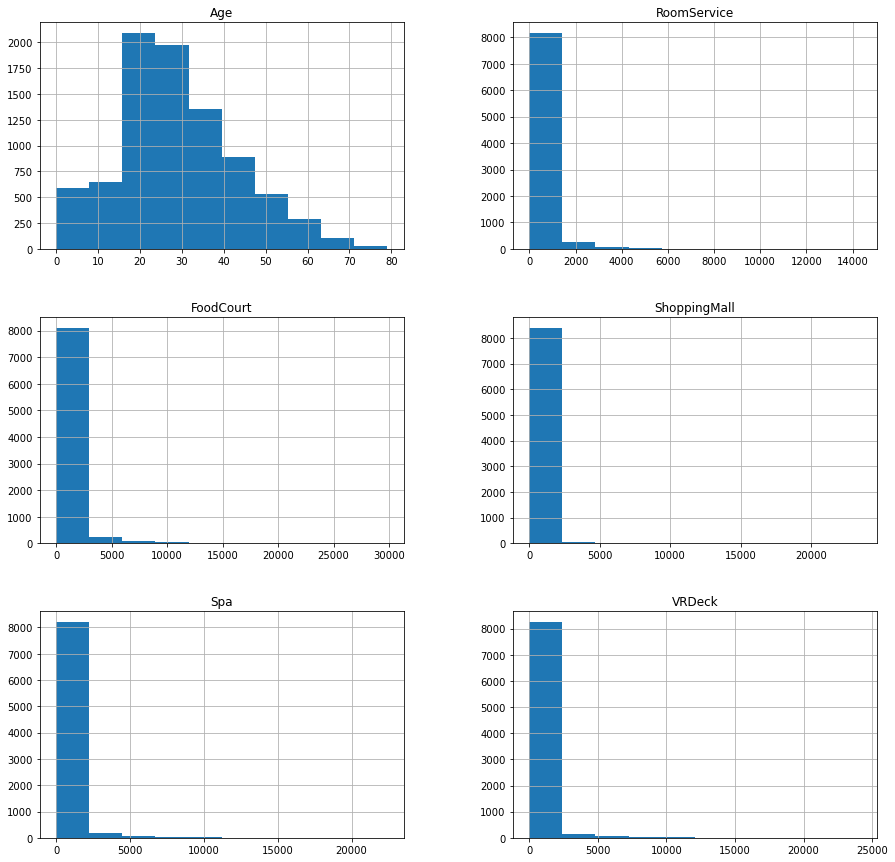

In [36]:
train_set.hist(figsize=(15, 15))

### g) Checking for missing values:

#### For the train set:

In [37]:
train_set.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### For the test set:

In [38]:
test_set.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## h) Checking for duplicated values:

In [39]:
num_train_dup = sum(train_set.duplicated())
num_test_dup = sum(test_set.duplicated())

print(f'Duplicates in the training set: {num_train_dup}\nDuplicates in the test set: {num_test_dup}')

Duplicates in the training set: 0
Duplicates in the test set: 0


## i) Correlation between the attributes:

In [40]:
corr = train_set.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


# 3) Data Cleaning:

## a) Dropping columns with unique values for each entry:

In [41]:
# Defining the columns to drop:
to_drop = ['PassengerId', 'Name', 'Cabin']

# Dropping the columns:
train_set.drop(to_drop, inplace=True, axis=1)
train_set.head()

test_passenger_ids = np.array(test_set.PassengerId)

test_set.drop(to_drop, inplace=True, axis=1)
test_set.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


# b) Filling the missing values.

The missing values are filled as follows:
* The missing numerical values are filled with the mean of the corresponding column.
* The missing categorical values are filled with the model of the corresponding column.

In [42]:
feature_types = {}
numerical = []
categorical = []
for col in train_set.columns:
    if not isinstance(train_set.loc[0, col], int) and not isinstance(train_set.loc[0, col], float) or isinstance(train_set.loc[0, col], bool):
        feature_types[col] = 'c' 
        categorical.append(col)
    else:
        numerical.append(col)
        feature_types[col] = 'n' 
feature_types

{'HomePlanet': 'c',
 'CryoSleep': 'c',
 'Destination': 'c',
 'Age': 'n',
 'VIP': 'c',
 'RoomService': 'n',
 'FoodCourt': 'n',
 'ShoppingMall': 'n',
 'Spa': 'n',
 'VRDeck': 'n',
 'Transported': 'c'}

In [43]:
# means = train_set[numerical].mean(axis=0)
# train_set.fillna(means, inplace=True)
train_set.dropna(inplace=True)
train_set.reset_index(drop=True)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
6918,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
6919,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
6920,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
6921,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [44]:
# modes = train_set[categorical].mode().iloc[0]
# train_set.fillna(modes, inplace=True)

In [45]:
median = test_set[numerical].median(axis=0)
test_set.fillna(median, inplace=True)

In [46]:
modes = test_set[categorical[:-1]].mode().iloc[0]
test_set.fillna(modes, inplace=True)

## b) Mapping the categorical features to numerical values:

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
categorical
le = LabelEncoder()

train_set[categorical[0]] = le.fit_transform(train_set[categorical[0]])

for cat in categorical:
    train_set[cat] = le.fit_transform(train_set[cat])
    
for cat in categorical[:-1]:
    test_set[cat] = le.fit_transform(test_set[cat])

# 4) Creating the dataset:

In [49]:
X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1]
X_test = np.array(test_set)

In [50]:
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

# 5) Creating the model and the training routine:

In [52]:
n_estimators = [100, 500, 750]
criterion = ['gini', 'entropy']
max_depth = [10, 30, 50]
# min_samples_split = [2, 5, 10, 20, 50]
# min_samples_leaf = [2, 5, 10, 20, 50]
max_features = [2, 5, 11]
bootstrap = [True, False]

# param_grid = {'n_estimators' : n_estimators, 'criterion' : criterion,
#               'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
#               'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
#              'bootstrap' : bootstrap}

param_grid = {'n_estimators' : n_estimators, 'criterion' : criterion,
              'max_depth' : max_depth, 'max_features' : max_features,
             'bootstrap' : bootstrap}

In [53]:
estimator = RandomForestClassifier()
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, verbose=1, cv=5, n_jobs=4)

In [54]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50], 'max_features': [2, 5, 11],
                         'n_estimators': [100, 500, 750]},
             verbose=1)

In [57]:
y_pred = clf.predict(X_train)

In [58]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred); 
print(report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3440
           1       0.84      0.87      0.86      3483

    accuracy                           0.85      6923
   macro avg       0.85      0.85      0.85      6923
weighted avg       0.85      0.85      0.85      6923



In [59]:
y_preds = clf.predict(X_test)

In [60]:
mapping = {0 : False, 1 : True}
y_preds = [mapping[i] for i in y_preds]

# 7) Saving the model and creating the submission file:

In [61]:
columns = ['PassengerId', 'Transported']
data = {'PassengerId':test_passenger_ids, 'Transported': y_preds}

In [62]:
submission_df = pd.DataFrame(columns=columns, data=data)
submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [63]:
len(submission_df)

4277

In [64]:
import os 

path = os.path.join(os.getcwd(), 'submission_file.csv')

In [65]:
submission_df.to_csv(path, index=False)